# Random Walk and Brownian Motion Simulation

## Theoretical Background

### Random Walk

A **random walk** is a mathematical formalization of a path consisting of successive random steps. In its simplest form, a one-dimensional random walk consists of a particle that moves either left or right with equal probability at each time step.

For a 1D random walk with step size $\Delta x$ and time step $\Delta t$, the position after $N$ steps is:

$$X_N = \sum_{i=1}^{N} \xi_i$$

where $\xi_i \in \{-\Delta x, +\Delta x\}$ with equal probability.

**Key Properties:**

1. **Mean position**: $\langle X_N \rangle = 0$

2. **Mean square displacement (MSD)**: $\langle X_N^2 \rangle = N (\Delta x)^2$

3. **Root mean square displacement**: $\sqrt{\langle X_N^2 \rangle} = \sqrt{N} \Delta x$

### Brownian Motion

**Brownian motion** (or Wiener process) emerges as the continuous limit of random walks. It describes the random motion of particles suspended in a fluid, first observed by Robert Brown in 1827 and theoretically explained by Einstein in 1905.

The **diffusion equation** governing the probability density $P(x,t)$ is:

$$\frac{\partial P}{\partial t} = D \frac{\partial^2 P}{\partial x^2}$$

where $D$ is the **diffusion coefficient**.

**Einstein's Relation:**

The diffusion coefficient relates to microscopic parameters:

$$D = \frac{(\Delta x)^2}{2\Delta t}$$

This leads to the fundamental result:

$$\langle X^2(t) \rangle = 2Dt \quad \text{(1D)}$$

$$\langle r^2(t) \rangle = 4Dt \quad \text{(2D)}$$

$$\langle r^2(t) \rangle = 6Dt \quad \text{(3D)}$$

### Central Limit Theorem Connection

By the **Central Limit Theorem**, the distribution of $X_N$ approaches a Gaussian:

$$P(X_N) \approx \frac{1}{\sqrt{2\pi N (\Delta x)^2}} \exp\left(-\frac{X_N^2}{2N(\Delta x)^2}\right)$$

This is the solution to the diffusion equation with an initial delta function at the origin.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

## 1D Random Walk Simulation

We begin by simulating multiple 1D random walks to visualize the spread of trajectories over time.

In [2]:
def simulate_1d_random_walk(n_steps, n_walks=1, step_size=1):
    """
    Simulate 1D random walks.
    
    Parameters:
    -----------
    n_steps : int
        Number of steps in each walk
    n_walks : int
        Number of independent walks to simulate
    step_size : float
        Size of each step
    
    Returns:
    --------
    positions : ndarray
        Array of shape (n_walks, n_steps+1) containing positions
    """
    # Generate random steps: +1 or -1 with equal probability
    steps = np.random.choice([-step_size, step_size], size=(n_walks, n_steps))
    
    # Calculate cumulative positions (prepend 0 for initial position)
    positions = np.zeros((n_walks, n_steps + 1))
    positions[:, 1:] = np.cumsum(steps, axis=1)
    
    return positions

# Simulate multiple 1D random walks
n_steps = 1000
n_walks = 500
walks_1d = simulate_1d_random_walk(n_steps, n_walks)

print(f"Simulated {n_walks} random walks with {n_steps} steps each")
print(f"Final positions range: [{walks_1d[:, -1].min():.1f}, {walks_1d[:, -1].max():.1f}]")

Simulated 500 random walks with 1000 steps each
Final positions range: [-82.0, 90.0]


## 2D Random Walk Simulation

In 2D, the particle can move in four directions (up, down, left, right) or at random angles.

In [3]:
def simulate_2d_random_walk(n_steps, n_walks=1, step_size=1):
    """
    Simulate 2D random walks with continuous angle distribution.
    
    Parameters:
    -----------
    n_steps : int
        Number of steps in each walk
    n_walks : int
        Number of independent walks to simulate
    step_size : float
        Size of each step
    
    Returns:
    --------
    x, y : ndarray
        Arrays of shape (n_walks, n_steps+1) containing x and y positions
    """
    # Generate random angles uniformly distributed in [0, 2π)
    angles = np.random.uniform(0, 2*np.pi, size=(n_walks, n_steps))
    
    # Calculate steps in x and y directions
    dx = step_size * np.cos(angles)
    dy = step_size * np.sin(angles)
    
    # Calculate cumulative positions
    x = np.zeros((n_walks, n_steps + 1))
    y = np.zeros((n_walks, n_steps + 1))
    x[:, 1:] = np.cumsum(dx, axis=1)
    y[:, 1:] = np.cumsum(dy, axis=1)
    
    return x, y

# Simulate 2D random walks
n_steps_2d = 1000
n_walks_2d = 500
x_2d, y_2d = simulate_2d_random_walk(n_steps_2d, n_walks_2d)

print(f"Simulated {n_walks_2d} 2D random walks with {n_steps_2d} steps each")

Simulated 500 2D random walks with 1000 steps each


## Mean Square Displacement Analysis

We now verify the theoretical prediction that $\langle r^2 \rangle \propto t$ (diffusive behavior).

In [4]:
def calculate_msd(positions):
    """
    Calculate mean square displacement over ensemble of walks.
    
    Parameters:
    -----------
    positions : ndarray
        Array of positions (n_walks, n_steps+1) for 1D
        or tuple of (x, y) arrays for 2D
    
    Returns:
    --------
    msd : ndarray
        Mean square displacement at each time step
    """
    if isinstance(positions, tuple):
        # 2D case
        x, y = positions
        r_squared = x**2 + y**2
    else:
        # 1D case
        r_squared = positions**2
    
    return np.mean(r_squared, axis=0)

# Calculate MSD for both 1D and 2D walks
msd_1d = calculate_msd(walks_1d)
msd_2d = calculate_msd((x_2d, y_2d))

# Time arrays
time_1d = np.arange(n_steps + 1)
time_2d = np.arange(n_steps_2d + 1)

## Distribution of Final Positions

We verify that the distribution of final positions approaches a Gaussian (Central Limit Theorem).

In [5]:
# Final positions for 1D walks
final_positions_1d = walks_1d[:, -1]

# Final distances from origin for 2D walks
final_distances_2d = np.sqrt(x_2d[:, -1]**2 + y_2d[:, -1]**2)

# Theoretical standard deviation for 1D: σ = √N for unit step size
sigma_theoretical_1d = np.sqrt(n_steps)

print(f"1D Final positions:")
print(f"  Theoretical σ = {sigma_theoretical_1d:.2f}")
print(f"  Measured σ = {np.std(final_positions_1d):.2f}")
print(f"  Mean = {np.mean(final_positions_1d):.2f} (expected: 0)")

1D Final positions:
  Theoretical σ = 31.62
  Measured σ = 31.52
  Mean = 0.41 (expected: 0)


## Comprehensive Visualization

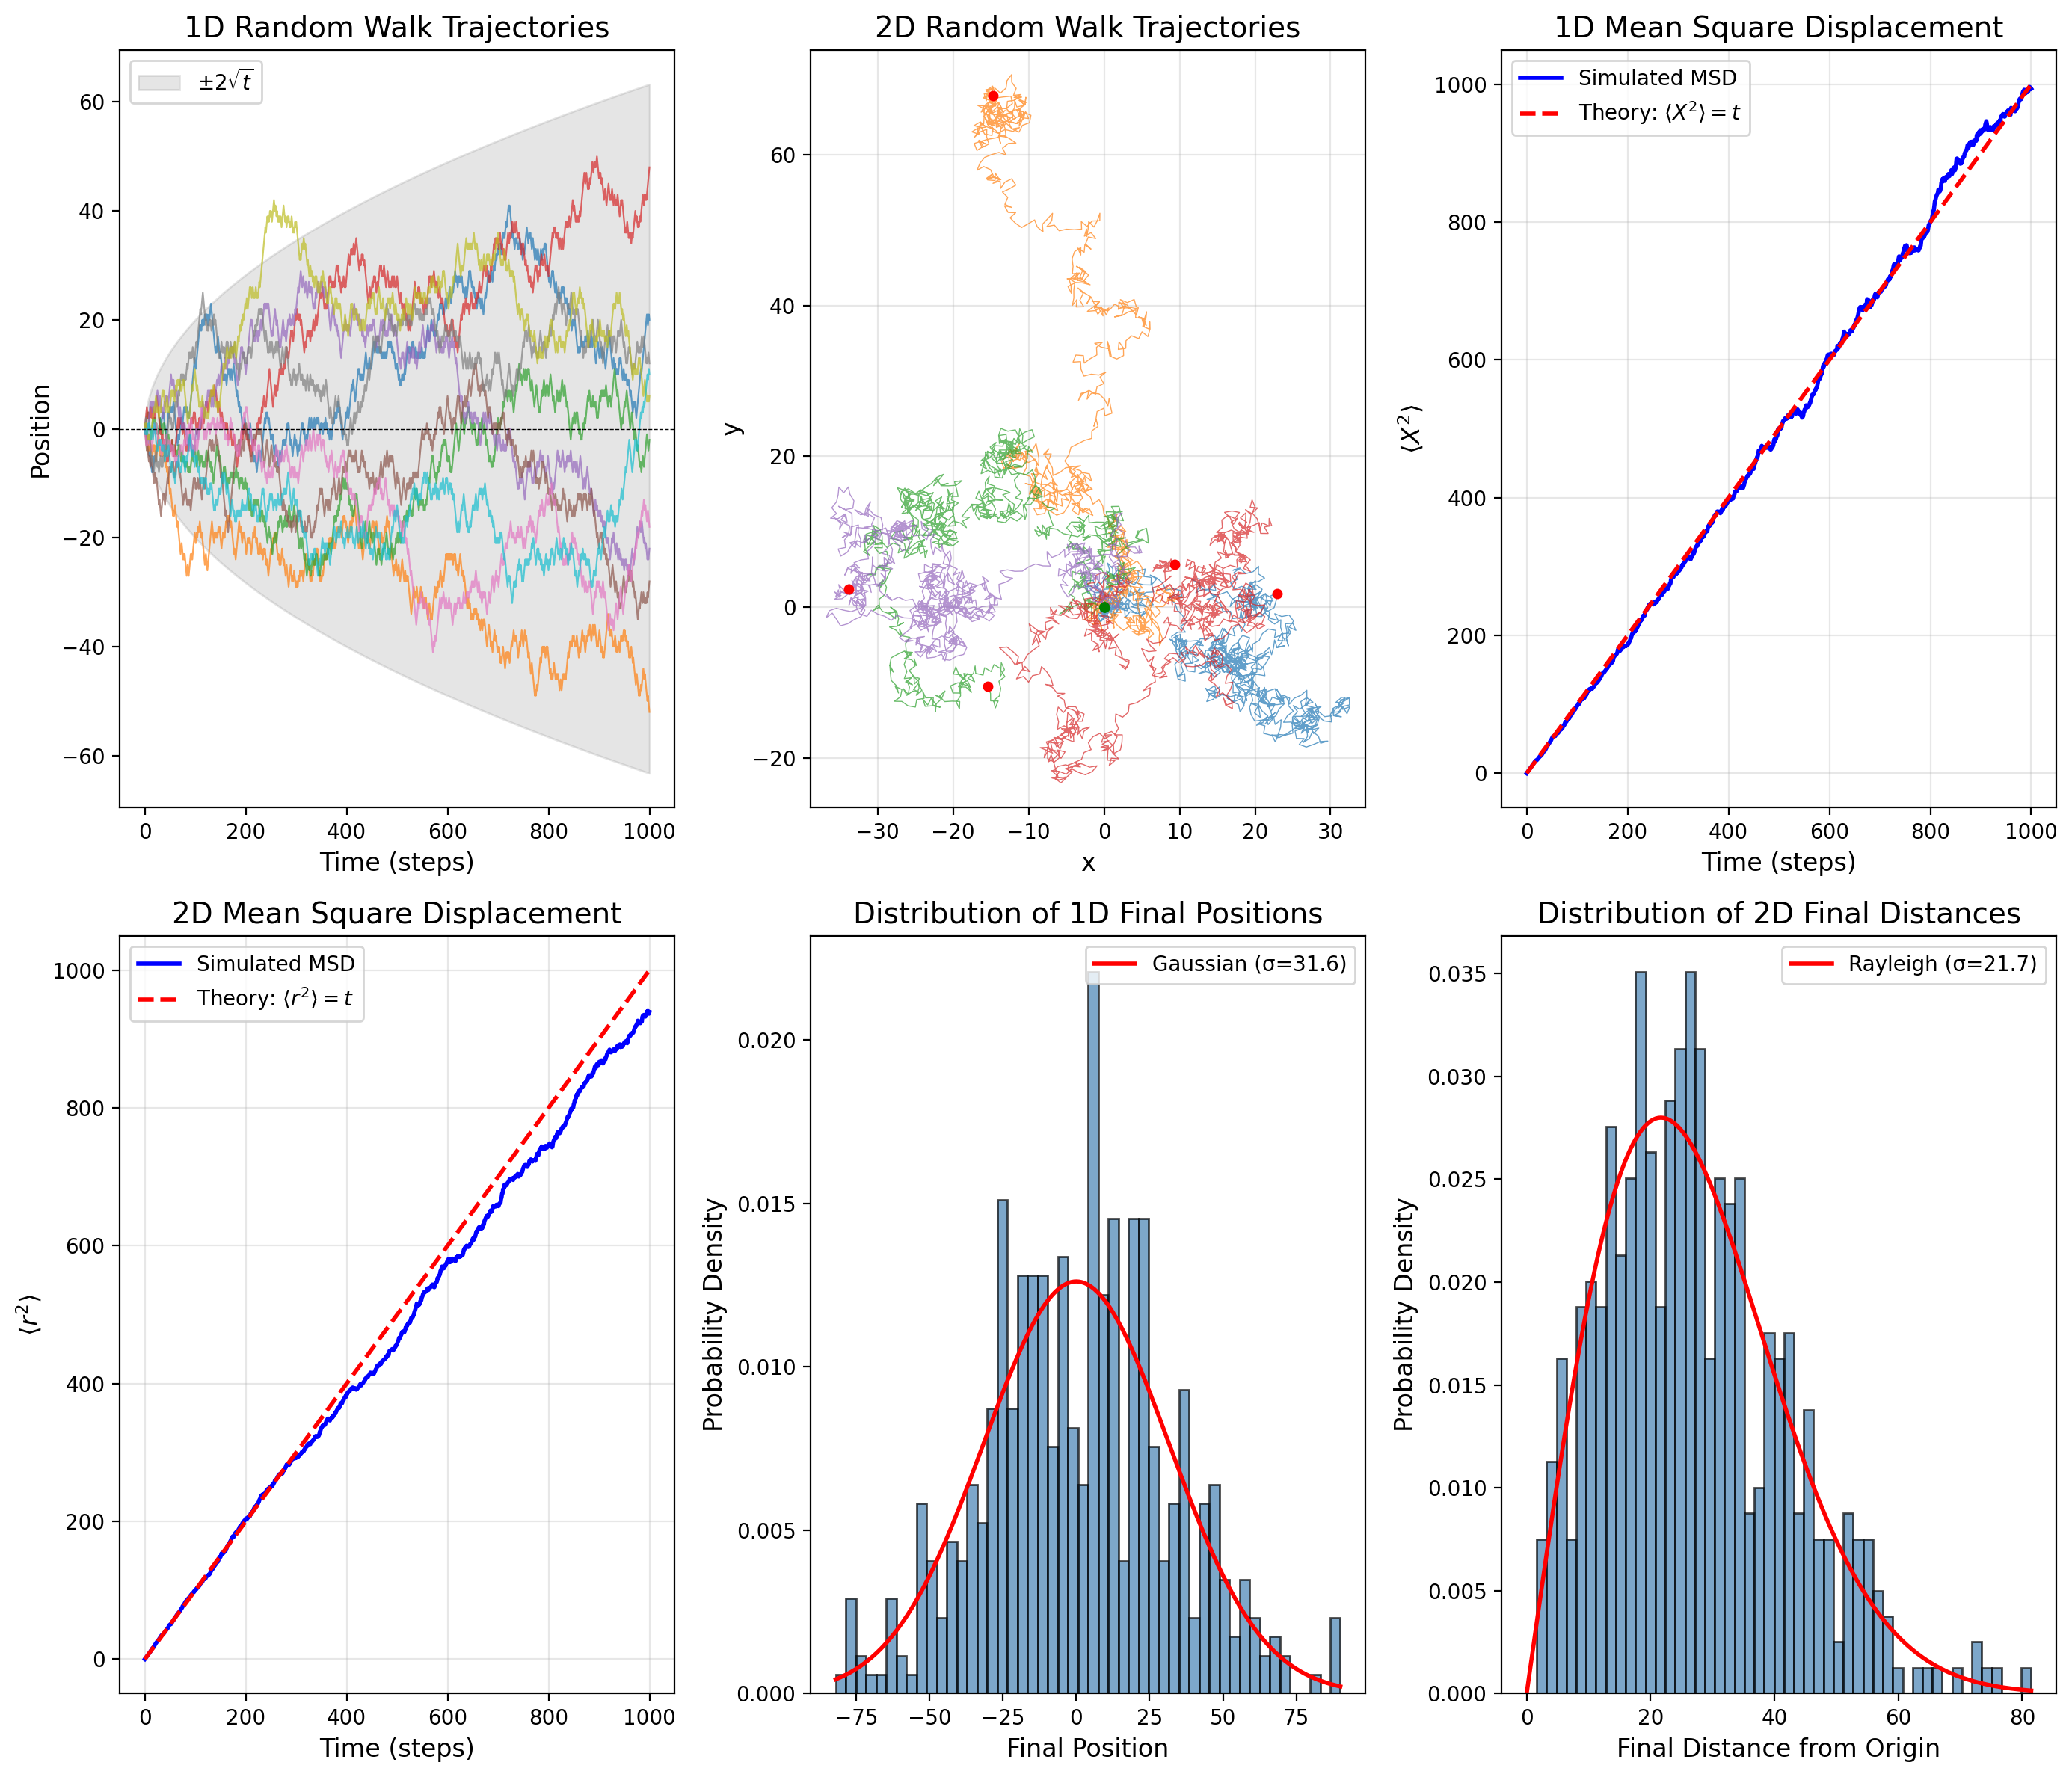


Plot saved to 'plot.png'


In [6]:
fig = plt.figure(figsize=(14, 12))

# Plot 1: Sample 1D random walks
ax1 = fig.add_subplot(2, 3, 1)
for i in range(10):
    ax1.plot(time_1d, walks_1d[i], alpha=0.7, linewidth=0.8)
ax1.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax1.fill_between(time_1d, 
                  -2*np.sqrt(time_1d), 
                  2*np.sqrt(time_1d), 
                  alpha=0.2, color='gray', 
                  label=r'$\pm 2\sqrt{t}$')
ax1.set_xlabel('Time (steps)')
ax1.set_ylabel('Position')
ax1.set_title('1D Random Walk Trajectories')
ax1.legend(loc='upper left')

# Plot 2: Sample 2D random walks
ax2 = fig.add_subplot(2, 3, 2)
for i in range(5):
    ax2.plot(x_2d[i], y_2d[i], alpha=0.7, linewidth=0.5)
    ax2.plot(x_2d[i, 0], y_2d[i, 0], 'go', markersize=4)  # Start
    ax2.plot(x_2d[i, -1], y_2d[i, -1], 'ro', markersize=4)  # End
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('2D Random Walk Trajectories')
ax2.axis('equal')
ax2.grid(True, alpha=0.3)

# Plot 3: Mean Square Displacement (1D)
ax3 = fig.add_subplot(2, 3, 3)
ax3.plot(time_1d, msd_1d, 'b-', linewidth=2, label='Simulated MSD')
ax3.plot(time_1d, time_1d, 'r--', linewidth=2, label=r'Theory: $\langle X^2 \rangle = t$')
ax3.set_xlabel('Time (steps)')
ax3.set_ylabel(r'$\langle X^2 \rangle$')
ax3.set_title('1D Mean Square Displacement')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Mean Square Displacement (2D)
ax4 = fig.add_subplot(2, 3, 4)
ax4.plot(time_2d, msd_2d, 'b-', linewidth=2, label='Simulated MSD')
# For 2D continuous angle walk, MSD = 2Dt with D = step_size^2/4
# This gives MSD = t * step_size^2 / 2 = t/2 for unit step
ax4.plot(time_2d, time_2d, 'r--', linewidth=2, label=r'Theory: $\langle r^2 \rangle = t$')
ax4.set_xlabel('Time (steps)')
ax4.set_ylabel(r'$\langle r^2 \rangle$')
ax4.set_title('2D Mean Square Displacement')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Distribution of final positions (1D)
ax5 = fig.add_subplot(2, 3, 5)
counts, bins, _ = ax5.hist(final_positions_1d, bins=50, density=True, 
                           alpha=0.7, color='steelblue', edgecolor='black')
# Theoretical Gaussian
x_range = np.linspace(bins[0], bins[-1], 200)
gaussian = stats.norm.pdf(x_range, 0, sigma_theoretical_1d)
ax5.plot(x_range, gaussian, 'r-', linewidth=2, 
         label=f'Gaussian (σ={sigma_theoretical_1d:.1f})')
ax5.set_xlabel('Final Position')
ax5.set_ylabel('Probability Density')
ax5.set_title('Distribution of 1D Final Positions')
ax5.legend()

# Plot 6: Distribution of final distances (2D) - Rayleigh distribution
ax6 = fig.add_subplot(2, 3, 6)
counts, bins, _ = ax6.hist(final_distances_2d, bins=50, density=True, 
                           alpha=0.7, color='steelblue', edgecolor='black')
# For 2D Brownian motion, the radial distribution follows Rayleigh
r_range = np.linspace(0, bins[-1], 200)
sigma_2d = np.sqrt(msd_2d[-1] / 2)  # σ² = MSD/2 for Rayleigh
rayleigh = (r_range / sigma_2d**2) * np.exp(-r_range**2 / (2 * sigma_2d**2))
ax6.plot(r_range, rayleigh, 'r-', linewidth=2, 
         label=f'Rayleigh (σ={sigma_2d:.1f})')
ax6.set_xlabel('Final Distance from Origin')
ax6.set_ylabel('Probability Density')
ax6.set_title('Distribution of 2D Final Distances')
ax6.legend()

plt.tight_layout()
plt.savefig('random_walk_and_brownian_motion_simulation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Conclusions

This simulation demonstrates several key properties of random walks and Brownian motion:

1. **Diffusive Scaling**: The mean square displacement grows linearly with time: $\langle r^2 \rangle \propto t$

2. **Central Limit Theorem**: The distribution of positions approaches a Gaussian for large $N$

3. **Rayleigh Distribution**: In 2D, the radial distance follows a Rayleigh distribution

4. **Einstein Relation**: The diffusion coefficient $D = \frac{(\Delta x)^2}{2d\Delta t}$ connects microscopic and macroscopic scales (where $d$ is the dimensionality)

These results form the foundation for understanding diffusion processes in physics, chemistry, biology, and finance.